In [209]:
from lightkurve import KeplerLightCurveFile
from george import kernels
from george.metrics import Metric
import matplotlib.pyplot as plt
import numpy as np
import george
from astropy.stats import median_absolute_deviation

str = KeplerLightCurveFile.from_archive(210408563)

Found 1 File(s)
INFO: Found cached file ./mastDownload/K2/ktwo210408563-c04_lc/ktwo210408563-c04_llc.fits with expected size 377280. [astroquery.query]


In [210]:
from scipy.optimize import minimize 
def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

/anaconda/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:165: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/anaconda/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:166: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


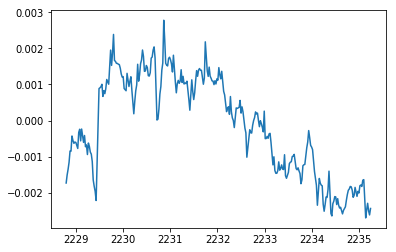

In [211]:
strPDC = str.PDCSAP_FLUX.remove_outliers()

y = strPDC.flux[:300]
x = strPDC.time[:300]
y = (y/np.median(y)) - 1
x = x[np.isfinite(y)]
y = y[np.isfinite(y)]


plt.plot(x,y)

In [212]:
kernel = np.var(y) * kernels.ExpSquaredKernel(1.0e-1) * kernels.CosineKernel(log_period = 0.5)
gp = george.GP(kernel)
gp.compute(x,y)
print(yerr.size)
print(x.size)
xpred = x
predVar = gp.predict(y,xpred, return_var = True)

1000
300


In [213]:
result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)
gp.set_parameter_vector(result.x)

      fun: -1733.641637631199
 hess_inv: array([[ 1.09017445e-01,  2.00184195e-02,  1.67960325e+02],
       [ 2.00184195e-02,  2.08227335e-01, -7.69810495e+03],
       [ 1.67960325e+02, -7.69810495e+03,  5.01867452e+08]])
      jac: array([ 1.18916665e-06, -2.14971847e-06, -1.94689947e-10])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 43
     njev: 45
   status: 0
  success: True
        x: array([-13.88959391,  -2.4894164 ,   6.68625856])


In [214]:
pred = gp.predict(y, xpred, return_var = True)

300
300


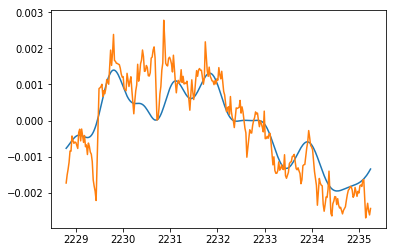

In [215]:
pred, pred_var = gp.predict(y, xpred, return_var = True)

#print(xpred.size)
#print(pred.size)
print(x.size)
print(y.size)

plt.plot(xpred,pred)

plt.plot(x,y)

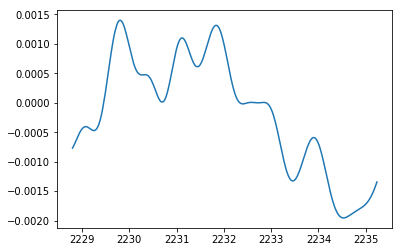

In [216]:
plt.plot(xpred,pred)